<a href="https://colab.research.google.com/github/carloshsieh22/timely_and_effective_care/blob/main/Timely_and_Effective_Care.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Timely and Effective Care: Data Analysis and Visualization on the Efficiency of Hospitals in America.

*   Tools Used: Python Pandas, Seaborn, Matplotlib, SkLearn
*   By Carlos Hsieh






In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
care_state = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-04-08/care_state.csv')
care_state = care_state.drop(['footnote', 'start_date', 'end_date'], axis=1)
states_to_drop = ['AS', 'GU', 'MP', 'PR', 'VI']
care_state = care_state[~care_state['state'].isin(states_to_drop)]
care_state['state'].unique()
care_state['measure_name'].unique()

array(['Percentage of healthcare personnel who are up to date with COVID-19 vaccinations',
       'Healthcare workers given influenza vaccination Higher percentages are better',
       'Average (median) time patients spent in the emergency department before leaving from the visit A lower number of minutes is better',
       'Average time patients spent in the emergency department before being sent home A lower number of minutes is better (high)',
       'Average time patients spent in the emergency department before being sent home A lower number of minutes is better (low)',
       'Average time patients spent in the emergency department before being sent home A lower number of minutes is better (moderate)',
       'Average (median) time patients spent in the emergency department before leaving from the visit- Psychiatric/Mental Health Patients.  A lower number of minutes is better',
       'Average time patients spent in the emergency department before leaving from the visit - Psychia

Cleaning the Data

In [ ]:
abbreviations = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "District of Columbia": "DC",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY"
}
care_state['state'] = care_state['state'].map({v: k for k, v in abbreviations.items()})
care_state

,state,condition,measure_id,measure_name,score
0,Alaska,Healthcare Personnel Vaccination,HCP_COVID_19,Percentage of healthcare personnel who are up ...,7.3
1,Alaska,Healthcare Personnel Vaccination,IMM_3,Healthcare workers given influenza vaccination...,80.0
2,Alaska,Emergency Department,OP_18b,Average (median) time patients spent in the em...,140.0
3,Alaska,Emergency Department,OP_18b_HIGH_MIN,Average time patients spent in the emergency d...,157.0
4,Alaska,Emergency Department,OP_18b_LOW_MIN,Average time patients spent in the emergency d...,136.0
...,...,...,...,...,...
1227,Wyoming,Sepsis Care,SEP_1,Percentage of patients who received appropriat...,68.0
1228,Wyoming,Sepsis Care,SEP_SH_3HR,Septic Shock 3-Hour Bundle,81.0
1229,Wyoming,Sepsis Care,SEP_SH_6HR,Septic Shock 6-Hour Bundle,79.0
1230,Wyoming,Sepsis Care,SEV_SEP_3HR,Severe Sepsis 3-Hour Bundle,83.0


In [ ]:
population = pd.read_csv('https://raw.githubusercontent.com/carloshsieh22/timely_and_effective_care/refs/heads/main/population.csv')

population = population.drop(['IBRC_Geo_ID', 'Statefips', 'Countyfips', 'Count or Estimate'], axis=1)
population = population[(population['Year'] == 2024) & (population['State or County Release'] == 'State')]
population = population[population['Description'].isin(abbreviations.keys())]
population = population.drop(['Year', 'State or County Release'], axis=1)


In [ ]:
merged = pd.merge(care_state, population, left_on="state", right_on='Description', how="inner")
merged.columns = (
    merged.columns
    .str.strip()            # remove leading/trailing spaces
    .str.lower()            # make lowercase
    .str.replace(" ", "_")  # replace spaces with underscores
    .str.replace("-", "_")  # replace dashes with underscores
)
merged.head(20)

,state,condition,measure_id,measure_name,score,description,population
0,Alaska,Healthcare Personnel Vaccination,HCP_COVID_19,Percentage of healthcare personnel who are up ...,7.3,Alaska,740133
1,Alaska,Healthcare Personnel Vaccination,IMM_3,Healthcare workers given influenza vaccination...,80.0,Alaska,740133
2,Alaska,Emergency Department,OP_18b,Average (median) time patients spent in the em...,140.0,Alaska,740133
3,Alaska,Emergency Department,OP_18b_HIGH_MIN,Average time patients spent in the emergency d...,157.0,Alaska,740133
4,Alaska,Emergency Department,OP_18b_LOW_MIN,Average time patients spent in the emergency d...,136.0,Alaska,740133
5,Alaska,Emergency Department,OP_18b_MEDIUM_MIN,Average time patients spent in the emergency d...,136.0,Alaska,740133
6,Alaska,Emergency Department,OP_18b_VERY_HIGH_MIN,Average time patients spent in the emergency d...,NaN,Alaska,740133
7,Alaska,Emergency Department,OP_18c,Average (median) time patients spent in the em...,196.0,Alaska,740133
8,Alaska,Emergency Department,OP_18c_HIGH_MIN,Average time patients spent in the emergency d...,230.0,Alaska,740133
9,Alaska,Emergency Department,OP_18c_LOW_MIN,Average time patients spent in the emergency d...,182.0,Alaska,740133


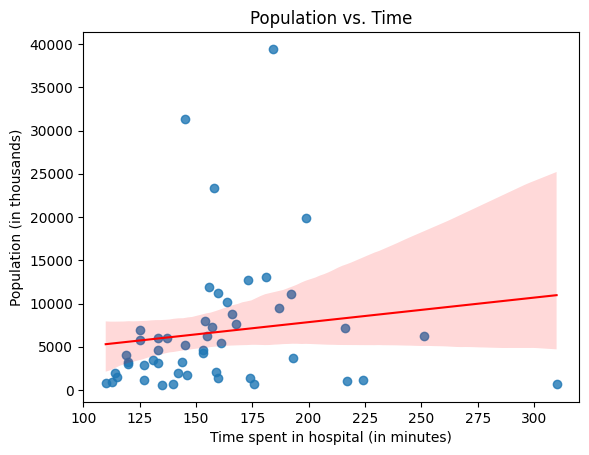

In [ ]:
median_time = merged[merged['measure_id'] == 'OP_18b']
sns.regplot(x=median_time['score'], y=median_time['population']/1000, line_kws={"color": "red", "linewidth": 1.5})
plt.title('Population vs. Time')
plt.xlabel('Time spent in hospital (in minutes)')
plt.ylabel('Population (in thousands)')
plt.show()

In [ ]:
print("The correlation between Population vs. Time spent in Hospital is: " + str(median_time['score'].corr(median_time['population']/1000)))

The correlation between Population vs. Time spent in Hospital is: 0.14106857468444292


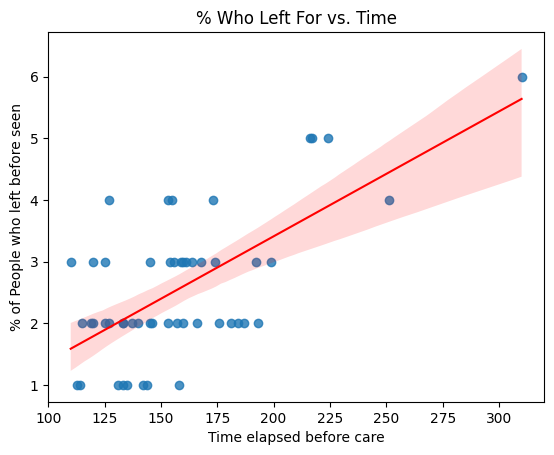

In [ ]:
left_before = merged[merged['measure_id'] == 'OP_22']
sns.regplot(x=median_time['score'], y=left_before['score'], line_kws={"color": "red", "linewidth": 1.5})
plt.title('% Who Left For vs. Time')
plt.xlabel('Time elapsed before care')
plt.ylabel('% of People who left before seen')
plt.show()

In [ ]:
pivoted = merged.pivot(index="state", columns="measure_id", values="score")
print("The correlation between % Who Received Stroke Care vs. Time is: " + str(pivoted["OP_18b"].corr(pivoted["SEP_1"])))
print("The correlation between % Who Left vs. Time is: " + str(pivoted["OP_18b"].corr(pivoted["OP_22"])))

The correlation between % Who Received Stroke Care vs. Time is: -0.3418335198514666
The correlation between % Who Left vs. Time is: 0.655313872508276


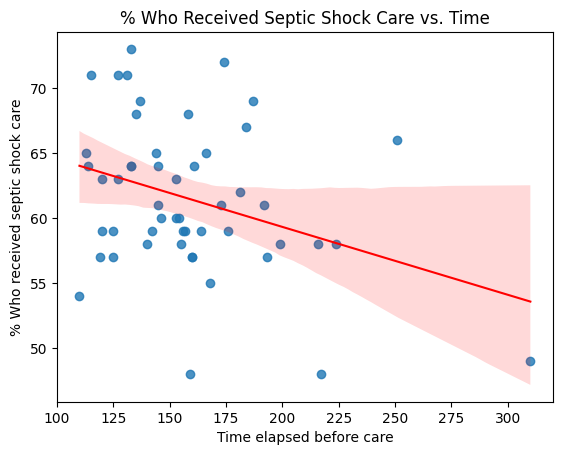

In [ ]:
sns.regplot(x=pivoted['OP_18b'], y=pivoted['SEP_1'], line_kws={"color": "red", "linewidth": 1.5})
plt.title('% Who Received Septic Shock Care vs. Time')
plt.xlabel('Time elapsed before care')
plt.ylabel('% Who received septic shock care')
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

cols = ["OP_18b", "SEP_1", "OP_22", "OP_23"]

# make a copy so we don’t overwrite
df_scaled = pivoted.copy()

df_scaled[cols] = scaler.fit_transform(df_scaled[cols])
df_scaled["SEP_1"] = 1 - df_scaled["SEP_1"] #invert the ones that are opposite
df_scaled["OP_23"] = 1 - df_scaled["OP_23"] #a higher % of people that receive stroke and brain scans is better
df_scaled["er_stress_index"] = df_scaled[cols].mean(axis=1)
df_scaled.sort_values("er_stress_index", ascending=False, inplace=True)
df_scaled['er_stress_index'].head(10)
df_scaled['er_stress_index'].tail(10)

,er_stress_index
state,
Arkansas,0.197596
Wyoming,0.187019
Nevada,0.175385
Montana,0.168173
Florida,0.153269
Nebraska,0.147885
Hawaii,0.129135
Wisconsin,0.123750
Utah,0.070288


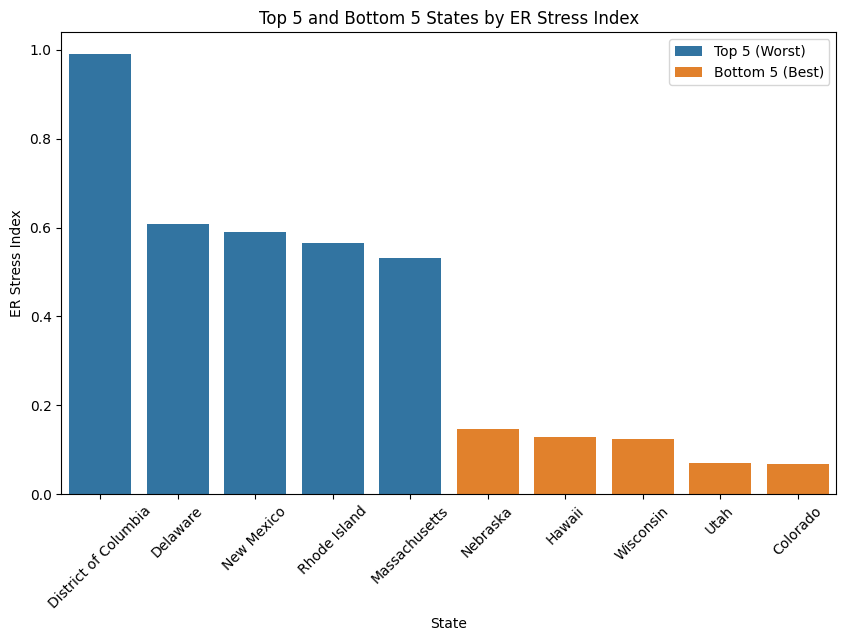

In [ ]:
top_and_bottoms = pd.concat([
    df_scaled.head(5).assign(group='Top 5 (Worst)'),
    df_scaled.tail(5).assign(group='Bottom 5 (Best)')
])
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_and_bottoms,
    x=top_and_bottoms.index,
    y='er_stress_index',
    hue='group',
    dodge=False
)
plt.ylabel("ER Stress Index")
plt.xlabel("State")
plt.title("Top 5 and Bottom 5 States by ER Stress Index")
plt.xticks(rotation=45)
plt.legend(title='')
plt.show()

In [ ]:
top_and_bottoms

measure_id,HCP_COVID_19,IMM_3,OP_18b,OP_18b_HIGH_MIN,OP_18b_LOW_MIN,OP_18b_MEDIUM_MIN,OP_18b_VERY_HIGH_MIN,OP_18c,OP_18c_HIGH_MIN,OP_18c_LOW_MIN,...,OP_29,OP_31,SAFE_USE_OF_OPIOIDS,SEP_1,SEP_SH_3HR,SEP_SH_6HR,SEV_SEP_3HR,SEV_SEP_6HR,er_stress_index,group
state,,,,,,,,,,,,,,,,,,,,,
District of Columbia,6.6,94.0,1.000,292.0,NaN,304.0,373.0,361.0,359.0,NaN,...,94.0,NaN,11.0,0.96,58.0,88.0,72.0,84.0,0.990000,Top 5 (Worst)
Delaware,38.3,84.0,0.535,218.0,NaN,170.0,283.0,418.0,415.0,NaN,...,96.0,NaN,15.0,1.00,57.0,81.0,76.0,82.0,0.607788,Top 5 (Worst)
New Mexico,18.4,73.0,0.245,172.0,134.0,183.0,298.0,279.0,221.0,262.0,...,79.0,NaN,12.0,1.00,63.0,75.0,73.0,83.0,0.589135,Top 5 (Worst)
Rhode Island,11.7,84.0,0.570,255.0,NaN,199.0,300.0,354.0,730.0,NaN,...,94.0,NaN,15.0,0.60,61.0,87.0,78.0,93.0,0.564615,Top 5 (Worst)
Massachusetts,46.4,93.0,0.530,239.0,154.0,201.0,245.0,349.0,441.0,318.0,...,96.0,NaN,18.0,0.60,68.0,81.0,78.0,90.0,0.530577,Top 5 (Worst)
Nebraska,10.0,75.0,0.020,NaN,109.0,155.0,161.0,157.0,NaN,152.0,...,92.0,NaN,18.0,0.36,73.0,89.0,80.0,89.0,0.147885,Bottom 5 (Best)
Hawaii,11.1,70.0,0.025,157.0,84.0,155.0,202.0,182.0,207.0,110.0,...,93.0,NaN,11.0,0.08,78.0,88.0,89.0,92.0,0.129135,Bottom 5 (Best)
Wisconsin,9.6,86.0,0.135,167.0,129.0,145.0,171.0,194.0,230.0,183.0,...,97.0,NaN,14.0,0.16,74.0,89.0,85.0,93.0,0.123750,Bottom 5 (Best)
Utah,8.6,91.0,0.105,173.0,114.0,142.0,169.0,202.0,219.0,182.0,...,95.0,NaN,15.0,0.08,70.0,83.0,87.0,93.0,0.070288,Bottom 5 (Best)


In [ ]:
pivoted
mean_wait_time = pivoted['OP_18b'].mean()
print("The average wait time to see care is: " + str(int((mean_wait_time))) + " minutes.")
stroke_care = pivoted['SEP_1'].mean()
print("The national percentage of people who receive septic shock care in the first 45 minutes is: " + str(int(stroke_care)) + "%")
stroke_care = pivoted['OP_23'].mean()
print("The national percentage of people who receive brain scans in the first 45 minutes is: " + str(int(stroke_care)) + "%")
left = pivoted['OP_22'].mean()
print("The national percentage of people who leave before receiving care is: " + str(int(left)) + "%")

The average wait time to see care is: 158 minutes.
The national percentage of people who receive septic shock care in the first 45 minutes is: 61%
The national percentage of people who receive brain scans in the first 45 minutes is: 66%
The national percentage of people who leave before receiving care is: 2%


In [ ]:
pivoted

measure_id,HCP_COVID_19,IMM_3,OP_18b,OP_18b_HIGH_MIN,OP_18b_LOW_MIN,OP_18b_MEDIUM_MIN,OP_18b_VERY_HIGH_MIN,OP_18c,OP_18c_HIGH_MIN,OP_18c_LOW_MIN,...,OP_22,OP_23,OP_29,OP_31,SAFE_USE_OF_OPIOIDS,SEP_1,SEP_SH_3HR,SEP_SH_6HR,SEV_SEP_3HR,SEV_SEP_6HR
state,,,,,,,,,,,,,,,,,,,,,
Alabama,5.9,76.0,145.0,172.0,119.0,168.0,191.0,226.0,230.0,192.0,...,3.0,67.0,93.0,100.0,14.0,61.0,70.0,86.0,80.0,92.0
Alaska,7.3,80.0,140.0,157.0,136.0,136.0,NaN,196.0,230.0,182.0,...,2.0,60.0,87.0,NaN,16.0,58.0,65.0,79.0,81.0,89.0
Arizona,17.4,85.0,168.0,205.0,130.0,148.0,200.0,262.0,266.0,206.0,...,3.0,68.0,91.0,NaN,11.0,55.0,63.0,79.0,75.0,88.0
Arkansas,2.7,81.0,133.0,166.0,114.0,149.0,206.0,203.0,232.0,167.0,...,2.0,72.0,92.0,NaN,16.0,64.0,77.0,87.0,82.0,90.0
California,22.4,73.0,184.0,193.0,151.0,164.0,206.0,270.0,291.0,248.0,...,2.0,73.0,91.0,NaN,14.0,67.0,74.0,87.0,82.0,93.0
Colorado,11.8,92.0,133.0,135.0,123.0,152.0,161.0,240.0,269.0,223.0,...,1.0,70.0,95.0,NaN,15.0,73.0,80.0,90.0,87.0,95.0
Connecticut,13.2,85.0,193.0,203.0,163.0,204.0,192.0,272.0,277.0,376.0,...,2.0,72.0,96.0,NaN,18.0,57.0,63.0,85.0,77.0,92.0
Delaware,38.3,84.0,217.0,218.0,NaN,170.0,283.0,418.0,415.0,NaN,...,5.0,73.0,96.0,NaN,15.0,48.0,57.0,81.0,76.0,82.0
District of Columbia,6.6,94.0,310.0,292.0,NaN,304.0,373.0,361.0,359.0,NaN,...,6.0,26.0,94.0,NaN,11.0,49.0,58.0,88.0,72.0,84.0


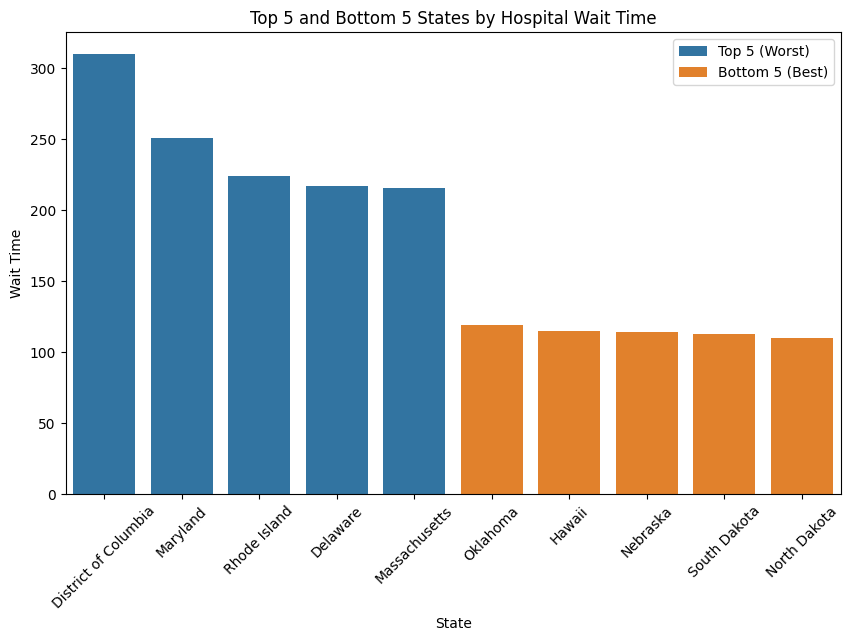

In [ ]:
plot_df = pivoted.sort_values("OP_18b", ascending=False)
plot_df = pd.concat([
    plot_df.head(5).assign(group='Top 5 (Worst)'),
    plot_df.tail(5).assign(group='Bottom 5 (Best)')
])
plt.figure(figsize=(10,6))
sns.barplot(
    data=plot_df,
    x= plot_df.index,
    y="OP_18b",
    hue="group",
    dodge=False  # preserve sorted order
)
plt.ylabel("Wait Time")
plt.xlabel("State")
plt.title("Top 5 and Bottom 5 States by Hospital Wait Time")
plt.xticks(rotation=45)
plt.legend(title='')
plt.show()

In [ ]:
plot_df

measure_id,HCP_COVID_19,IMM_3,OP_18b,OP_18b_HIGH_MIN,OP_18b_LOW_MIN,OP_18b_MEDIUM_MIN,OP_18b_VERY_HIGH_MIN,OP_18c,OP_18c_HIGH_MIN,OP_18c_LOW_MIN,...,OP_23,OP_29,OP_31,SAFE_USE_OF_OPIOIDS,SEP_1,SEP_SH_3HR,SEP_SH_6HR,SEV_SEP_3HR,SEV_SEP_6HR,group
state,,,,,,,,,,,,,,,,,,,,,
District of Columbia,6.6,94.0,310.0,292.0,NaN,304.0,373.0,361.0,359.0,NaN,...,26.0,94.0,NaN,11.0,49.0,58.0,88.0,72.0,84.0,Top 5 (Worst)
Maryland,10.4,94.0,251.0,266.0,154.0,245.0,234.0,431.0,526.0,221.0,...,67.0,95.0,100.0,15.0,66.0,82.0,87.0,81.0,91.0,Top 5 (Worst)
Rhode Island,11.7,84.0,224.0,255.0,NaN,199.0,300.0,354.0,730.0,NaN,...,63.0,94.0,NaN,15.0,58.0,61.0,87.0,78.0,93.0,Top 5 (Worst)
Delaware,38.3,84.0,217.0,218.0,NaN,170.0,283.0,418.0,415.0,NaN,...,73.0,96.0,NaN,15.0,48.0,57.0,81.0,76.0,82.0,Top 5 (Worst)
Massachusetts,46.4,93.0,216.0,239.0,154.0,201.0,245.0,349.0,441.0,318.0,...,68.0,96.0,NaN,18.0,58.0,68.0,81.0,78.0,90.0,Top 5 (Worst)
Oklahoma,14.6,84.0,119.0,158.0,105.0,154.0,129.0,194.0,289.0,164.0,...,70.0,93.0,NaN,12.0,57.0,65.0,83.0,76.0,91.0,Bottom 5 (Best)
Hawaii,11.1,70.0,115.0,157.0,84.0,155.0,202.0,182.0,207.0,110.0,...,67.0,93.0,NaN,11.0,71.0,78.0,88.0,89.0,92.0,Bottom 5 (Best)
Nebraska,10.0,75.0,114.0,NaN,109.0,155.0,161.0,157.0,NaN,152.0,...,67.0,92.0,NaN,18.0,64.0,73.0,89.0,80.0,89.0,Bottom 5 (Best)
South Dakota,3.2,89.0,113.0,175.0,112.0,NaN,177.0,146.0,164.0,146.0,...,54.0,98.0,NaN,17.0,65.0,69.0,80.0,83.0,94.0,Bottom 5 (Best)
